## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [8]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import Input, Dense, BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):    
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
save_best_only = [True, False]

In [14]:
results = {}
# 載入 Callbacks
"""
Write your training loop and show the results
"""
from keras.callbacks import EarlyStopping, ModelCheckpoint

for sbo in save_best_only:
    earlystop = EarlyStopping(monitor='val_acc', patience=5, verbose=1)
    model_ckpt = ModelCheckpoint(filepath=f'./keras_save/save_best_only = {sbo}.h5', monitor="val_loss", save_best_only=sbo)
    """
    Your Training loop and Plot the results
    """
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f'save_best_only = {sbo}')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.95)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, 
              callbacks=[earlystop, model_ckpt])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
        
    name_tag = f'save_best_only = {sbo}'
    
    # Load back
    model = keras.models.load_model(f'./keras_save/save_best_only = {sbo}.h5')
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    results[name_tag] = {'loss_loadback': loss_loadback, 'acc_loadback': acc_loadback, 'train-loss': train_loss, 
                         'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}

save_best_only = True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 1

C:\Users\ALIN\.conda\envs\py37\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 5s 92us/step - loss: 1.4471 - accuracy: 0.4863 - val_loss: 1.6709 - val_accuracy: 0.4054
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3499 - accuracy: 0.5208 - val_loss: 1.5854 - val_accuracy: 0.4412
Epoch 4/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2819 - accuracy: 0.5438 - val_loss: 1.6212 - val_accuracy: 0.4344
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.2295 - accuracy: 0.5643 - val_loss: 1.7521 - val_accuracy: 0.3910
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.1791 - accuracy: 0.5809 - val_loss: 1.5697 - val_accuracy: 0.4598
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.1338 - accuracy: 0.5971 - val_loss: 1.7193 - val_accuracy: 0.4278
Epoch 8/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.0955 - accuracy: 0.6106 - val_loss: 1.5374 - 

C:\Users\ALIN\.conda\envs\py37\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 4s 88us/step - loss: 1.4507 - accuracy: 0.4869 - val_loss: 1.6231 - val_accuracy: 0.4283
Epoch 3/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.3556 - accuracy: 0.5189 - val_loss: 1.8384 - val_accuracy: 0.3761
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.2899 - accuracy: 0.5441 - val_loss: 1.6048 - val_accuracy: 0.4379
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.2356 - accuracy: 0.5596 - val_loss: 1.5584 - val_accuracy: 0.4486
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.1818 - accuracy: 0.5789 - val_loss: 1.7095 - val_accuracy: 0.4119
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1367 - accuracy: 0.5964 - val_loss: 1.8042 - val_accuracy: 0.4021
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.0945 - accuracy: 0.6123 - val_loss: 1.6278 - va

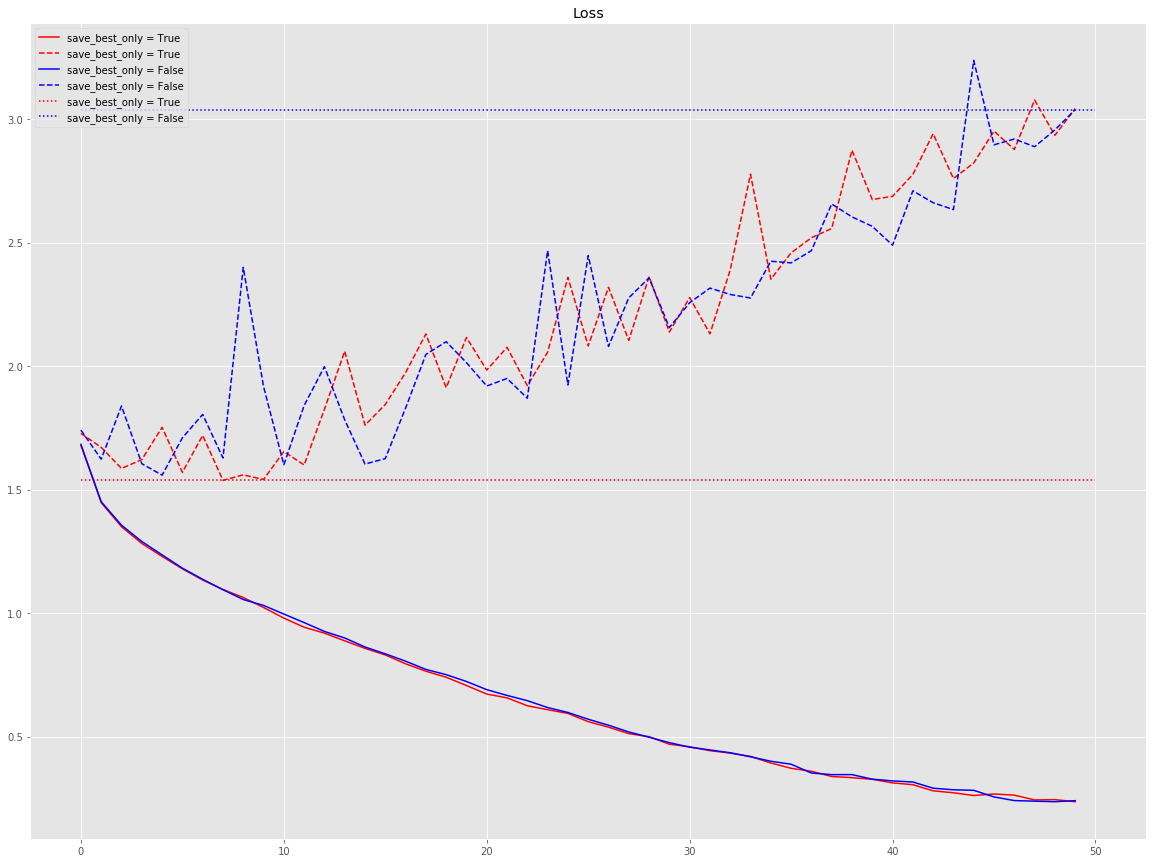

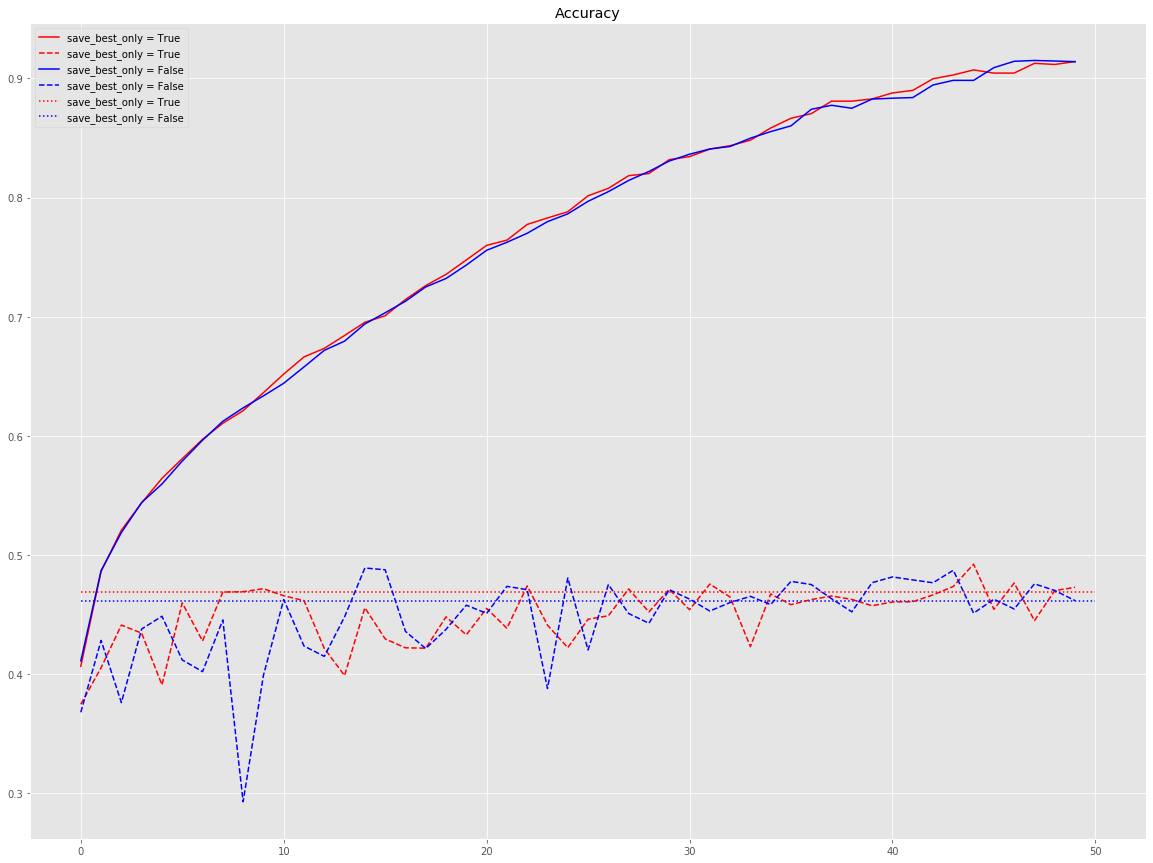

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
color_bar = ['r', 'b']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['loss_loadback'], xmin=0, xmax=len(train_loss), linestyles=':', 
               label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['acc_loadback'], xmin=0, xmax=len(train_loss), linestyles=':', 
               label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()